In [161]:
import numpy as np
from tqdm import tqdm 
import matplotlib.pyplot as plt
import pandas as pd
import preprocess

from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
from keras.layers.normalization import BatchNormalization
from keras.layers import Activation
from keras.layers import Dropout

import keras
import cv2

In [170]:
# Creating dictionary of labels
class_labels = {str(x):x for x in range(10)}
class_labels.update({'+':10, 'times':11, '-':12 })
label_class = dict( zip(class_labels.values(), class_labels.keys() ))

# Loading data from .npy file and spliting into training and validation sets
path = '/Users/josejoy/Desktop/ECE 271B Stat Learning /project/Training Data/'
data, labels = preprocess.load_data(class_labels, path+'data_ver1.npy' , path+'labels_ver1.npy'
                                   , train = 0.99 , val = 0.01)

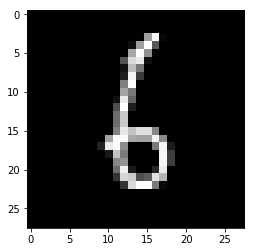

Label =  6


In [168]:
idx = np.random.randint(data['train'].shape[0])
plt.imshow(data['train'][idx,:].reshape(28,28),cmap = 'gray')
plt.show()
print('Label = ',label_class[ np.argmax(labels['train'][idx,:])])

## Keras (single stage model)

In [171]:
# Single stage model 
model = Sequential()

model.add(Dense(256, input_dim=784, kernel_initializer ='uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))
   
model.add(Dense(128, kernel_initializer ='uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(64, kernel_initializer ='uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(13, kernel_initializer ='uniform', activation='softmax'))


# model.add(Dense(256, input_dim = 784, kernel_initializer='uniform', activation='relu'))
# model.add(Dense(128, kernel_initializer='uniform', activation='relu'))
# model.add(Dense(64, kernel_initializer='uniform', activation='relu'))
# model.add(Dense(16, kernel_initializer='uniform', activation='relu'))
# model.add(Dense(13, kernel_initializer='uniform', activation='softmax'))

adam1 = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=adam1,metrics=['accuracy'] )

model.fit(data['train'], labels['train'], epochs=30, batch_size=256)
eval1 = model.evaluate(data['val'], labels['val'], batch_size=256)
print('Model in testing  = ',eval1)

# serialize model to JSON
model_json = model.to_json()
with open("./trained models/MLP_singlestage_ver1.1.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("./trained models/MLP_singlestage_ver1.1.h5")
print("Saved model to disk")

Epoch 1/30
21497/21497 [==============================] - 4s 176us/step - loss: 1.3371 - acc: 0.7536
Epoch 2/30
21497/21497 [==============================] - 3s 119us/step - loss: 0.4450 - acc: 0.9116
Epoch 3/30
21497/21497 [==============================] - 3s 119us/step - loss: 0.2738 - acc: 0.9343
Epoch 4/30
21497/21497 [==============================] - 3s 121us/step - loss: 0.2041 - acc: 0.9479
Epoch 5/30
21497/21497 [==============================] - 3s 120us/step - loss: 0.1674 - acc: 0.9551
Epoch 6/30
21497/21497 [==============================] - 3s 120us/step - loss: 0.1385 - acc: 0.9619
Epoch 7/30
21497/21497 [==============================] - 3s 121us/step - loss: 0.1223 - acc: 0.9669
Epoch 8/30
21497/21497 [==============================] - 3s 122us/step - loss: 0.1095 - acc: 0.9711
Epoch 9/30
21497/21497 [==============================] - 3s 122us/step - loss: 0.1005 - acc: 0.9703
Epoch 10/30
21497/21497 [==============================] - 3s 123us/step - loss: 0.0937 - a

## Keras multistage model (Under construction)

In [174]:
label_full = {}
temp1 = np.argmax(labels['train'],1).reshape(-1,1)
temp1 = np.column_stack((temp1,temp1))
temp1[temp1[:,0]<10,0] = 0
temp1[temp1[:,0]>=10,0] = 1
temp1[temp1[:,1]<10,1] = 1
temp1[temp1[:,1]>=10,1] = 0
label_full['train'] = temp1

temp1 = np.argmax(labels['val'],1).reshape(-1,1)
temp1 = np.column_stack((temp1,temp1))
temp1[temp1[:,0]<10,0] = 0
temp1[temp1[:,0]>=10,0] = 1
temp1[temp1[:,1]<10,1] = 1
temp1[temp1[:,1]>=10,1] = 0
label_full['val'] = temp1

stage1 = Sequential()
stage1.add(Dense(64, input_dim = 784, kernel_initializer='uniform', activation='relu'))
stage1.add(Dense(16, kernel_initializer='uniform', activation='relu'))
stage1.add(Dense(2, kernel_initializer='uniform', activation='softmax'))

adam1 = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
stage1.compile(loss=keras.losses.categorical_crossentropy, optimizer=adam1,metrics=['accuracy'] )

stage1.fit(data['train'], labels['train'], epochs=10, batch_size=256)
eval1 = stage1.evaluate(data['val'], labels['val'], batch_size=256)
print('Model in testing  = ',eval1)

# serialize model to JSON
model_json = model.to_json()
with open("./trained models/MLP_singlestage_ver2.1.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("./trained models/MLP_singlestage_ver2.1.h5")
print("Saved model to disk")

Epoch 1/10
74927/74927 [==============================] - 5s 67us/step - loss: 0.8968 - acc: 0.7292
Epoch 2/10
74927/74927 [==============================] - 4s 50us/step - loss: 0.3175 - acc: 0.9103
Epoch 3/10
74927/74927 [==============================] - 4s 60us/step - loss: 0.2258 - acc: 0.9365
Epoch 4/10
74927/74927 [==============================] - 5s 60us/step - loss: 0.1718 - acc: 0.9520
Epoch 5/10
74927/74927 [==============================] - 5s 60us/step - loss: 0.1390 - acc: 0.9610
Epoch 6/10
74927/74927 [==============================] - 4s 56us/step - loss: 0.1185 - acc: 0.9664
Epoch 7/10
74927/74927 [==============================] - 4s 58us/step - loss: 0.1027 - acc: 0.9712
Epoch 8/10
74927/74927 [==============================] - 4s 53us/step - loss: 0.0912 - acc: 0.9746
Epoch 9/10
74927/74927 [==============================] - 4s 57us/step - loss: 0.0799 - acc: 0.9777
Epoch 10/10
8325/8325 [==============================] - 0s 52us/step
Model in testing  =  [0.096790

## Tensorflow Models (Early stage; requires work; dont use )

In [ ]:
# Parameters
learning_rate = 0.001
training_epochs = 100
batch_size = 100
display_step = 1

# Network Parameters
n_hidden_1 = 256 # 1st layer number of neurons
n_hidden_2 = 64 # 1st layer number of neurons
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = labels['val'].shape[1] # MNIST total classes (0-9 digits)

# tf Graph input
X = tf.placeholder("float", [None, n_input], name = 'Input')
Y = tf.placeholder("float", [None, n_classes], name = 'Labels')
drop = tf.placeholder("float", name = 'droput_prob')

# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1]), name = 'weights1'),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2]), name = 'weights2'),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]), name = 'weightsout')
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1]), name = 'bias1'),
    'b2': tf.Variable(tf.random_normal([n_hidden_2]), name = 'bias2'),
    'out': tf.Variable(tf.random_normal([n_classes]), name = 'biasout')
}

# Create model
def multilayer_perceptron(x):
    # Hidden fully connected layer 
    layer_1 = tf.nn.dropout( tf.nn.relu(tf.add(tf.matmul(x, weights['h1']), biases['b1'])), drop)
#     Hidden fully connected layer 
    layer_2 = tf.nn.dropout( tf.nn.relu(tf.add(tf.matmul(layer_1, weights['h2']), biases['b2']) ), drop)
    # Hidden fully connected layer with 256 neurons
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

# Construct model
logits = multilayer_perceptron(X)

# Define loss and optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)



In [ ]:
# Initializing the variables
init = tf.global_variables_initializer()

# Add ops to save and restore all the variables.
saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(init)
    writer = tf.summary.FileWriter('logs', sess.graph)

    # Training cycle
    for epoch in tqdm(range(training_epochs)):
        avg_cost = 0.
        total_batch = int( data['train'].shape[0]/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            if i < total_batch - 1:
                batch_x =  data['train'][i*batch_size : (i+1)*batch_size, : ]
                batch_y = labels['train'][i*batch_size : (i+1)*batch_size, : ]
            else : 
                batch_x =  data['train'][i*batch_size : , : ]
                batch_y = labels['train'][i*batch_size : , : ]

            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([train_op, loss_op], feed_dict={X: batch_x, Y: batch_y, drop : 1})
                                                            
            # Compute average loss
            avg_cost += c / total_batch
            
#         tf.summary.scalar('avg_cost',avg_cost)
        # Display logs per epoch step
#         if epoch % display_step == 0:
#             print("Epoch:", '%04d' % (epoch+1), "cost={:.9f}".format(avg_cost))

    # Test model
    pred = tf.nn.softmax(logits)  # Apply softmax to logits
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(Y, 1))
    
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Train Accuracy:", accuracy.eval({X: data['train'], Y: labels['train'], drop:1 }))
    print("Test Accuracy:", accuracy.eval({X: data['val'], Y: labels['val'], drop:1 }))
    
      # Save the variables to disk.
    path = '/Users/josejoy/Desktop/ECE 271B Stat Learning /project/trained models/'
    save_path = saver.save(sess, path+"3layer_MLP.ckpt")
    print("Model saved in path: %s" % save_path)
    
#     classification = sess.run(pred, feed_dict={X: data['val']})
#     print(classification)

    writer.close()

In [ ]:
tf.reset_default_graph()

# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1]), name = 'weights1'),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2]), name = 'weights2'),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]), name = 'weightsout')
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1]), name = 'bias1'),
    'b2': tf.Variable(tf.random_normal([n_hidden_2]), name = 'bias2'),
    'out': tf.Variable(tf.random_normal([n_classes]), name = 'biasout')
}


# Add ops to save and restore all the variables.
saver = tf.train.Saver()

# Later, launch the model, use the saver to restore variables from disk, and
# do some work with the model.
with tf.Session() as sess:
  # Restore variables from disk.
    path = '/Users/josejoy/Desktop/ECE 271B Stat Learning /project/trained models/'
    saver.restore(sess, path+"3layer_MLP.ckpt")
    print("Model restored.")
  # Check the values of the variables
    print("h1 : %s" % weights['h1'].eval())
    print("b1 : %s" % biases['b1'].eval())